In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame using the correct pandas function and filename
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
df.head()


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


# Average sales per weekday
This cell computes the average `Umsatz` (sales) for each weekday and plots a bar chart showing the relationship between weekday and average sales.

/tmp/ipykernel_53709/3110975966.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_weekday = df2.groupby('weekday')['Umsatz'].mean().reindex(weekday_order)


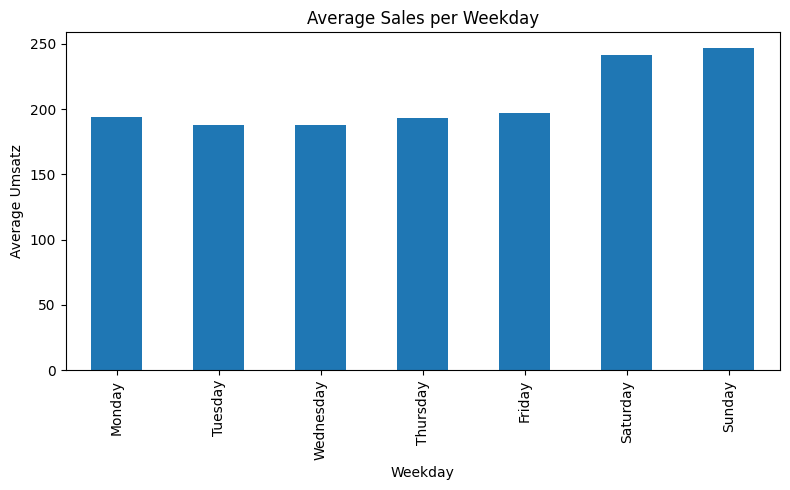

weekday
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64

In [2]:
# Ensure the date column is a datetime and compute average Umsatz per weekday
import pandas as pd
import matplotlib.pyplot as plt
# parse dates (coerce errors to NaT)
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
# drop rows missing date or Umsatz
df2 = df.dropna(subset=['Datum', 'Umsatz']).copy()
# create weekday name and order
df2['weekday'] = df2['Datum'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df2['weekday'] = pd.Categorical(df2['weekday'], categories=weekday_order, ordered=True)
# compute mean Umsatz per weekday
avg_by_weekday = df2.groupby('weekday')['Umsatz'].mean().reindex(weekday_order)
# plot bar chart
plt.figure(figsize=(8,5))
avg_by_weekday.plot(kind='bar', color='C0')
plt.xlabel('Weekday')
plt.ylabel('Average Umsatz')
plt.title('Average Sales per Weekday')
plt.tight_layout()
plt.show()
# show the numeric results as the output as well
avg_by_weekday


/tmp/ipykernel_53709/3251449043.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df2.groupby('weekday')['Umsatz']


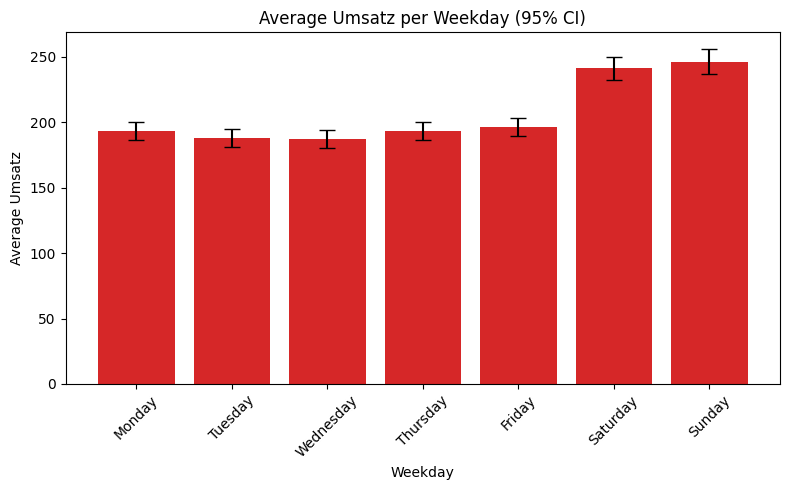

,mean,count,ci_lower,ci_upper
weekday,,,,
Monday,193.688449,1324,186.815568,200.561330
Tuesday,187.944440,1345,181.175254,194.713626
Wednesday,187.477523,1342,180.564072,194.390975
Thursday,193.232274,1334,186.163440,200.301108
Friday,196.796023,1311,189.890446,203.701600
Saturday,241.319882,1336,232.358358,250.281407
Sunday,246.495651,1342,236.934896,256.056406


In [3]:
# Compute 95% confidence intervals for average Umsatz per weekday and plot with error bars
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# try to use scipy for t critical values if available, otherwise use normal approx (z=1.96)
try:
    import scipy.stats as st
    has_scipy = True
except Exception:
    has_scipy = False
# prepare data: parse dates and drop missing values (safe to repeat)
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df2 = df.dropna(subset=['Datum', 'Umsatz']).copy()
df2['weekday'] = df2['Datum'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df2['weekday'] = pd.Categorical(df2['weekday'], categories=weekday_order, ordered=True)
# group and compute stats
group = df2.groupby('weekday')['Umsatz']
stats = group.agg(['mean','count','std']).reindex(weekday_order)
# standard error
stats['se'] = stats['std'] / np.sqrt(stats['count'])
# critical values: per-group t if scipy present, else z=1.96
if has_scipy:
    # use t.ppf for two-sided 95% (alpha=0.05); set ci NaN for count < 2
    crits = stats['count'].apply(lambda n: st.t.ppf(1-0.025, df=max(int(n)-1,1)) if n>=2 else np.nan)
else:
    crits = pd.Series(1.96, index=stats.index)
stats['ci_half'] = crits * stats['se']
stats['ci_lower'] = stats['mean'] - stats['ci_half']
stats['ci_upper'] = stats['mean'] + stats['ci_half']
# plot means with error bars (CI halves)
plt.figure(figsize=(8,5))
x = np.arange(len(stats))
plt.bar(x, stats['mean'], yerr=stats['ci_half'], capsize=6, color='C3')
plt.xticks(x, stats.index, rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz per Weekday (95% CI)')
plt.tight_layout()
plt.show()
# display numeric results for inspection
stats[['mean','count','ci_lower','ci_upper']]
